In [6]:
#Importing libraries 
from scipy import stats
from scipy.stats import norm, skew 
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/cleaned_data.csv")

In [3]:
df

,Unnamed: 0,Asset,State,Post Code,Address,Date,Time,Count Last Year,Count This Year,Count Var,...,Time of maximum wind gust,9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Count
0,0,Baldivis,WA,6171,"20 Settlers Ave, Baldivis WA 6171",1/01/2022,00:00:00,0,0,0,...,17:38:00,55,10,24.0,1012.8,67,12,41.0,1010.9,0
1,1,Baldivis,WA,6171,"20 Settlers Ave, Baldivis WA 6171",1/01/2022,01:00:00,0,0,0,...,17:38:00,55,10,24.0,1012.8,67,12,41.0,1010.9,0
2,2,Baldivis,WA,6171,"20 Settlers Ave, Baldivis WA 6171",1/01/2022,02:00:00,0,0,0,...,17:38:00,55,10,24.0,1012.8,67,12,41.0,1010.9,0
3,3,Baldivis,WA,6171,"20 Settlers Ave, Baldivis WA 6171",1/01/2022,03:00:00,0,0,0,...,17:38:00,55,10,24.0,1012.8,67,12,41.0,1010.9,0
4,4,Baldivis,WA,6171,"20 Settlers Ave, Baldivis WA 6171",1/01/2022,04:00:00,12,9,-3,...,17:38:00,55,10,24.0,1012.8,67,12,41.0,1010.9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104683,104683,Rockhampton,QLD,4701,"120-331 Yaamba Rd, Park Avenue QLD 4701",31/12/2021,19:00:00,194,286,92,...,08:23:00,53,10,20.0,1008.0,53,3,24.0,1005.5,194
104684,104684,Rockhampton,QLD,4701,"120-331 Yaamba Rd, Park Avenue QLD 4701",31/12/2021,20:00:00,145,257,112,...,08:23:00,53,10,20.0,1008.0,53,3,24.0,1005.5,145
104685,104685,Rockhampton,QLD,4701,"120-331 Yaamba Rd, Park Avenue QLD 4701",31/12/2021,21:00:00,71,94,23,...,08:23:00,53,10,20.0,1008.0,53,3,24.0,1005.5,71
104686,104686,Rockhampton,QLD,4701,"120-331 Yaamba Rd, Park Avenue QLD 4701",31/12/2021,22:00:00,43,33,-10,...,08:23:00,53,10,20.0,1008.0,53,3,24.0,1005.5,43


In [5]:
print(df['Count'].astype(float).describe())

count    104688.000000
mean        496.674003
std         677.327439
min           0.000000
25%           5.000000
50%         144.000000
75%         819.000000
max        5632.000000
Name: Count, dtype: float64


<AxesSubplot:xlabel='9am wind speed (km/h)', ylabel='Count'>

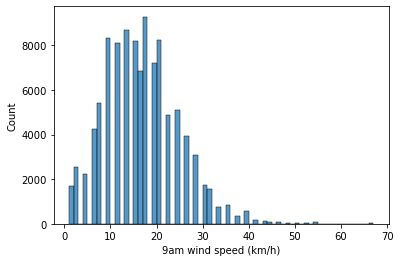

In [8]:
sns.histplot(data=df, x="9am wind speed (km/h)", binwidth=1, )

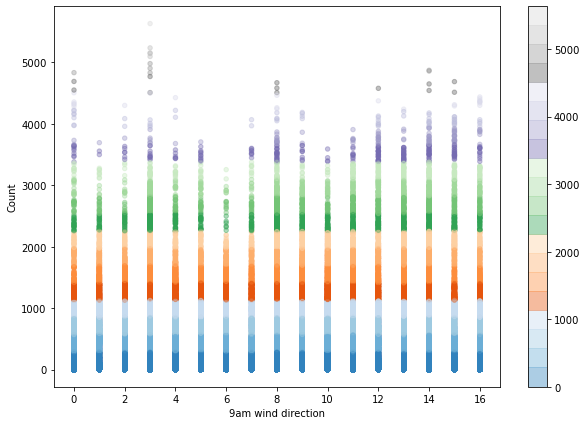

In [13]:
df.plot(kind="scatter", x="9am wind direction", y="Count", alpha=0.4, figsize=(10,7), c=df["Count"].astype(float), cmap="tab20c", colorbar=True, sharex=False);

Text(0.5, 0, 'Count')

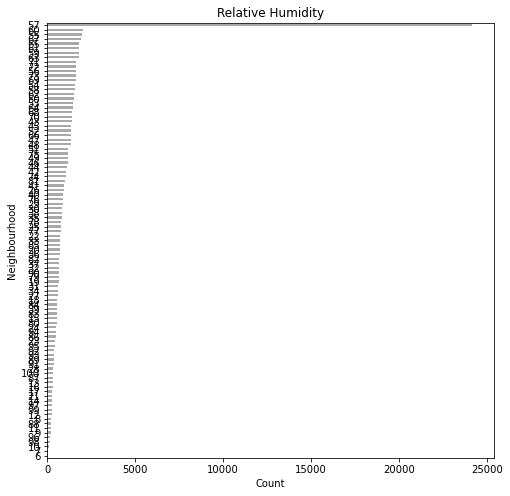

In [16]:
df['3pm relative humidity (%)'].value_counts().sort_values().plot(kind='barh', color='darkgrey', figsize=(8, 8))
plt.title('Relative Humidity')
plt.ylabel('Neighbourhood')
plt.xlabel('Count')

In [26]:
x1 = df['Count Last Year', 'Count This Year', 'Count Var', 'Minimum temperature (?C)', 'Maximum temperature (?C)', 'Rainfall (mm)', 'Speed of maximum wind gust (km/h)', '9am relative humidity (%)', '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)', '3pm relative humidity (%)', '3pm wind direction', '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']


#sns.heatmap(x1)

KeyError: ('Count Last Year', 'Count This Year', 'Count Var', 'Minimum temperature (?C)', 'Maximum temperature (?C)', 'Rainfall (mm)', 'Speed of maximum wind gust (km/h)', '9am relative humidity (%)', '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)', '3pm relative humidity (%)', '3pm wind direction', '3pm wind speed (km/h)', '3pm MSL pressure (hPa)')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104688 entries, 0 to 104687
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         104688 non-null  int64  
 1   Asset                              104688 non-null  object 
 2   State                              104688 non-null  object 
 3   Post Code                          104688 non-null  int64  
 4   Address                            104688 non-null  object 
 5   Date                               104688 non-null  object 
 6   Time                               104688 non-null  object 
 7   Count Last Year                    104688 non-null  int64  
 8   Count This Year                    104688 non-null  int64  
 9   Count Var                          104688 non-null  int64  
 10  Date.1                             104688 non-null  object 
 11  Minimum temperature (?C)           1046